# Indo Data Week - 2019
## Computer Vision Workshop - Classification of Movie Genre from Movie Posters

**Context :**

For movie viewers, the movie posters are one of the first impressions which humans use to get cues about the movie content and its genre. Humans can grasp the cues like color, expressions on the faces of actors etc to quickly determine the genre (horror, comedy, animation etc). It has been shown that color characteristics of an image like hues, saturation, brightness, contour etc. affect human emotions. A given situation arouses these emotions in humans. If humans are able to predict genre of a movie by a single glance at its poster, then we can assume that the color characteristics, local texture based features and structural cues of posters possess some characteristics which could be utilized in machine learning algorithms to predict its genre. [*]

**Content :**

The movie posters are obtained from IMDB website. The collected dataset contains IMDB Id, IMDB Link, Title, IMDB Score, Genre and link to download movie posters. Each Movie poster can belong to at least one genre and can have at most 3 genre labels assigned to it. As the dataset also includes the IMDB score, it would be really interesting to see if movie poster is related to rating. [*]

**Acknowledgements :**

The IMDB Id for movies were obtained from MovieLens. The IMDB Link, Title, IMDB Score, Genre and link to download movie posters were obtained from IMDB website. [*]

**Inspiration :**

Does color plays an important role in deciding the genre of the movie? Can raw image pixels contain enough information to predict genre from movie? Does number of faces in the poster say anything about the movie genre? What is the most frequent color used in horror movies? Which features are important to predict animated movie genre? If a movie belong to more than one genre, can we predict them all? Can we use movie posters only to predict movie rating [*]

[*][Ref: https://www.kaggle.com/neha1703/movie-genre-from-its-poster]

In [1]:
## Setting up the environment for Google Colab Access
#! git clone https://github.com/adib0073/Indo-Data-Week-2019-CV-Workshop.git
#from google.colab import drive
#drive.mount('/content/drive')
#import sys 
#sys.path.insert(0, r'/content/Indo-Data-Week-2019-CV-Workshop')
path = ''
#path = '/content/Indo-Data-Week-2019-CV-Workshop/'

#### Getting started
Importing the modules. We will be using Keras as the high-level layer and tenforflow as the backend for performing this computer vision classification problem.
For more information on Keras please visit: [https://keras.io/] and for more information on Tensorflow please visit [https://www.tensorflow.org/]

In [16]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
print('Eager Execution uses TensorFlow\'s imperative programming environment that evaluates operations immediately')
tf.enable_eager_execution()
print("Eager execution: {}".format(tf.executing_eagerly()))
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Eager Execution uses TensorFlow's imperative programming environment that evaluates operations immediately
Eager execution: True


**Please note**: for the actual problem, the data collection and ETL is a major step. Considering the time constraint, and for simplicity of this session, this session will focus on a small subset of the total data-set.
As an extension to this workshop, it is recommended to explore the actual Kaggle challenge on the entire dataset.

For the purpose of the session, the extraction process  is skipped and the dataset required for the scope of this workshop is already provided.

### Exploratory Data Analysis (EDA):

Getting to know about your dataset even before deep diving into the algorithm.
EDA process typically includes doing an initial analysis on the data, which generally includes and not restricted to the following:
1. Size and nature of the dataset
2. Distribution of the dataset
3. Statistical operations on the dataset (as and when applicable)
4. Taking a glance at the data

**Note** : For the purpose of making this session more interactive, some of these sections are designed to have some gaps and scopes of improvements. Incase if you find some of these areas of improvements, please feel free to discuss!

**Pop Quiz** : Why do you think EDA is required?

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('The processed_data.csv consists of one-hot encoded data-frame which includes information about the data-set provided.')
data = pd.read_csv(path + 'processed_data.csv')    # reading the csv file
data.head()

The processed_data.csv consists of one-hot encoded data-frame which includes information about the data-set provided.


,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


**Pop Quiz**: *How to see distribution of the dataset? Is histogram the right way?*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012D86C2EB00>,
      dtype=object)

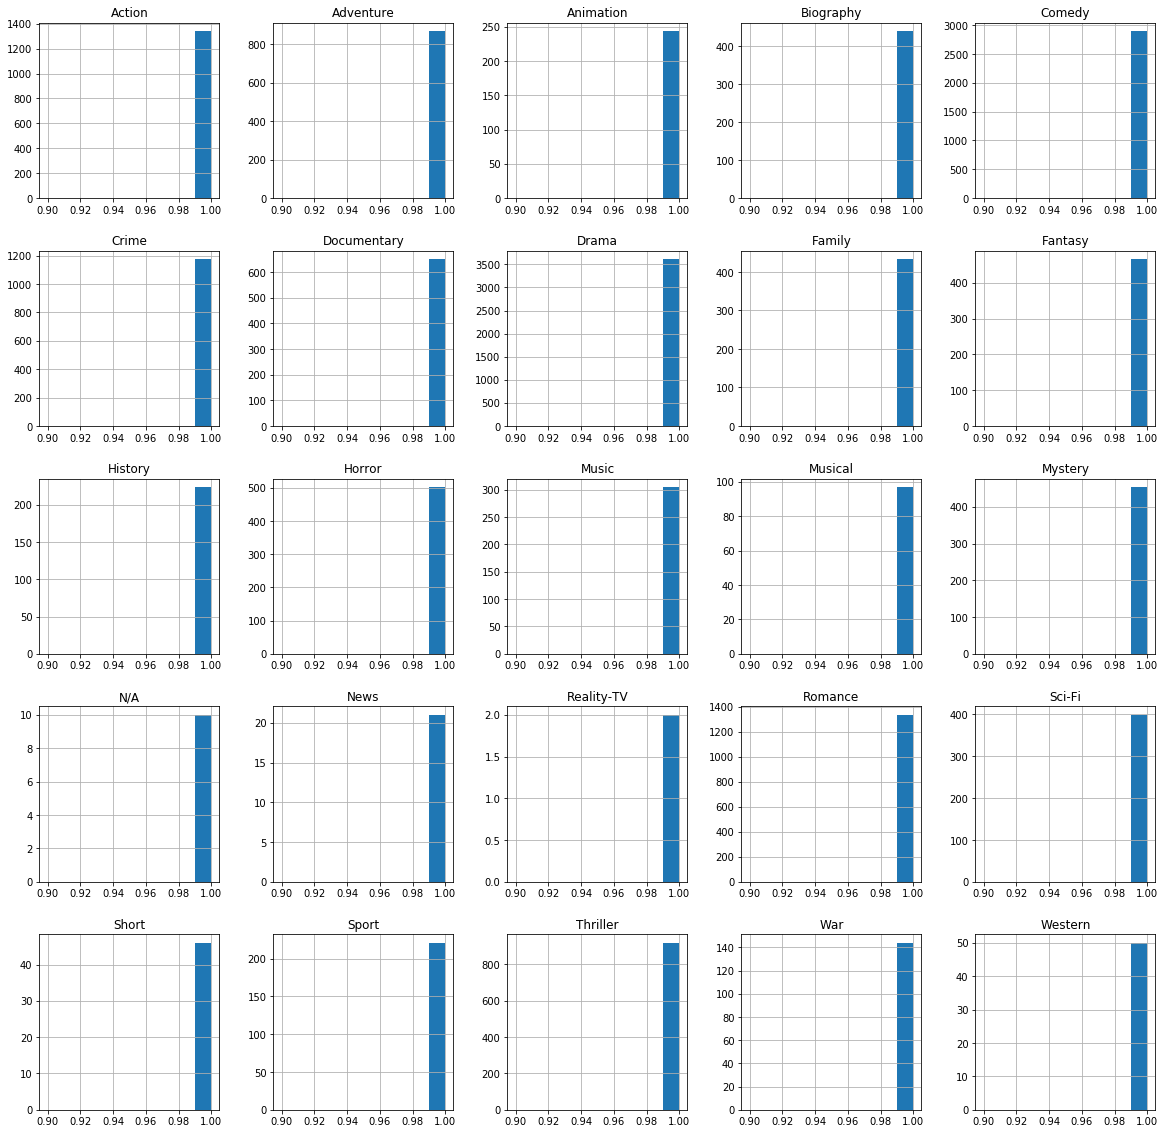

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] =20, 20
data.hist(range=(0.9, 1))

**Task** : Portray the same information from above in a tabular form

In [6]:
print('What are the different movie genres included in the dataset?')
data.columns

What are the different movie genres included in the dataset?


Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

### Data preparation:
Before even feeding the data into the model, often the input data has to be pre-processed or prepared so that the model can ingest easily.

1. Loading the image data in machine readable form

In [7]:
train_image = []
for i in tqdm(range(data.shape[0])):
    img = image.load_img(path + 'image_data/'+ data['Id'][i] +'.jpg',target_size=(250,250,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

100%|██████████████████████████████████████████████████████████████████████████████| 7254/7254 [01:26<00:00, 83.66it/s]


**Task** : Try alternating the target size and re-train the model and evaluate the algorithm performance

In [8]:
print('2. Convert the transformed data into numpy arrays for an efficient model operations')
train_data = np.array(train_image)

2. Convert the transformed data into numpy arrays for an efficient model operations


In [9]:
print('3. Inspect the dimension of the training data')
train_data.shape

3. Inspect the dimension of the training data


(7254, 250, 250, 3)

4. Taking a glance at the data


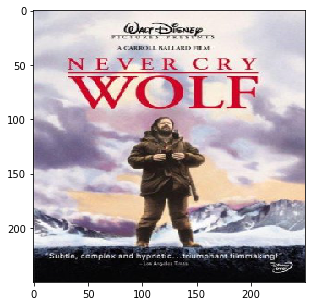

In [10]:
print('4. Taking a glance at the data')
rcParams['figure.figsize'] = 5, 5
plt.imshow(train_data[20])

In [11]:
print('What can be the Genre of this movie?')
data['Genre'][20]

What can be the Genre of this movie?


"['Adventure', 'Drama']"

5. Preparing the target labels for the training data as it is a supervised learning problem.

In [12]:
target_label = np.array(data.drop(['Id', 'Genre'],axis=1))
target_label.shape

(7254, 25)

6. Train-test split, making the data ready for feeding into the model

**Task**: Try out different train-test split ratio and find out which works best for the model.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train_data, target_label, random_state=42, test_size=0.1)

MemoryError: 

### Preparing the deep-learning computer vision model

Custom layered architecture - sequential model

In [12]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(250,250,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 246, 246, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 123, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 123, 123, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 119, 119, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 55, 55, 64)        51264     
__________

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Task** : Try out different opimizers, loss function and model evaluation metrics

In [14]:
# Clearing out memory
train_data = []

In [15]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

NameError: name 'model' is not defined

**Task** : Try with different values of epochs and batch size

**Pop Quiz** : Differentiate between SGD, batch gradient descent and mini-batch gradient descent

### Save and Load Model Weights for a faster execution

In [ ]:
#!pip install h5py
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open(path + 'model.json', 'w') as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(path + 'model.h5')
print("Saved model to disk")
 
    
# load json and create model
json_file = open(path + 'model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(path + 'model.h5')
print("Loaded model from disk")

### Testing the model on new imput

In [8]:
img = image.load_img(path +'test_images/GOT.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255

Drama (0.505)
Action (0.273)
Crime (0.241)
Thriller (0.213)


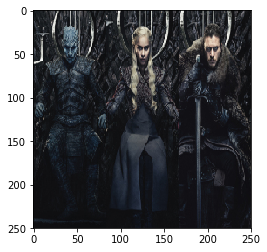

In [24]:
classes = np.array(data.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_4 = np.argsort(proba[0])[:-5:-1]
for i in range(4):
    print("{}".format(classes[top_4[i]])+" ({:.3})".format(proba[0][top_4[i]]))
plt.imshow(img)

Drama (0.504)
Action (0.263)
Crime (0.237)
Thriller (0.201)


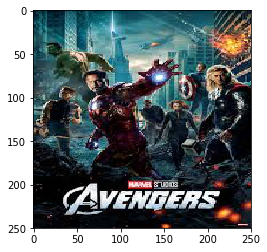

In [26]:
img = image.load_img(path +'test_images/Dhamaal.jpg',target_size=(250,250,3))
img = image.img_to_array(img)
img = img/255
classes = np.array(data.columns[2:])
proba = model.predict(img.reshape(1,250,250,3))
top_4 = np.argsort(proba[0])[:-5:-1]
for i in range(4):
    print("{}".format(classes[top_4[i]])+" ({:.3})".format(proba[0][top_4[i]]))
plt.imshow(img)

#### Task:
1. Compare the performance with different architectures
2. Model Performance Evaluation
3. Retrain with more data

### * * * Bonus content - Neural Style Transfer * * *

Something interesting and fun now!

In this tutorial, we will learn how to use deep learning to compose images in the style of another image. This is known as neural style transfer! This is a technique outlined in Leon A. Gatys' paper, A Neural Algorithm of Artistic Style [https://arxiv.org/abs/1508.06576], which is a great read, and you should definitely check it out.


So, neural style transfer is an optimization technique used to take three images, a content image, a style reference image (such as an artwork by a famous painter), and the input image you want to style -- and blend them together such that the input image is transformed to look like the content image, but “painted” in the style of the style image.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['axes.grid'] = False

import numpy as np
from PIL import Image
import time
import functools

In [2]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe

from tensorflow.python.keras.preprocessing import image as kp_image
from tensorflow.python.keras import models 
from tensorflow.python.keras import losses
from tensorflow.python.keras import layers
from tensorflow.python.keras import backend as K

For example, let’s take an image of the movie poster of Jurassic Park and Vincent Van Gough's starry night:

In [ ]:
import os
img_dir = '/nst'
if not os.path.exists(img_dir):
    os.makedirs(img_dir)
!wget --quiet -P /nst/ https://d13ezvd6yrslxm.cloudfront.net/wp/wp-content/images/jurassicpark-trex-grant-flare.jpg
!wget --quiet -P /nst/ https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg

The principle of neural style transfer is to define two distance functions, one that describes how different the content of two images are , $L_{content}$, and one that describes the difference between two images in terms of their style, $L_{style}$. Then, given three images, a desired style image, a desired content image, and the input image (initialized with the content image), we try to transform the input image to minimize the content distance with the content image and its style distance with the style image. 
In summary, we’ll take the base input image, a content image that we want to match, and the style image that we want to match. We’ll transform the base input image by minimizing the content and style distances (losses) with backpropagation, creating an image that matches the content of the content image and the style of the style image. 

### We will follow the general steps to perform style transfer:

1. Visualize data
2. Basic Preprocessing/preparing our data
3. Set up loss functions 
4. Create model
5. Optimize for loss function

In [10]:
print('Eager Execution uses TensorFlow\'s imperative programming environment that evaluates operations immediately')
tf.enable_eager_execution()
print("Eager execution: {}".format(tf.executing_eagerly()))

Eager Execution uses TensorFlow's imperative programming environment that evaluates operations immediately


NameError: name 'tf' is not defined

In [11]:
# Set up some global values here
content_path = '/nst/jurassicpark-trex-grant-flare.jpg'
style_path = '/nst/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg'

### Visualize the input

In [6]:
def load_img(path_to_img):
    max_dim = 512
    img = Image.open(path_to_img)
    long = max(img.size)
    scale = max_dim/long
    img = img.resize((round(img.size[0]*scale), round(img.size[1]*scale)), Image.ANTIALIAS)

    img = kp_image.img_to_array(img)

    # We need to broadcast the image array such that it has a batch dimension 
    img = np.expand_dims(img, axis=0)
    return img

In [7]:
def imshow(img, title=None):
    # Remove the batch dimension
    out = np.squeeze(img, axis=0)
    # Normalize for display 
    out = out.astype('uint8')
    plt.imshow(out)
    if title is not None:
        plt.title(title)
    plt.imshow(out)

These are input content and style images. We hope to "create" an image with the content of our content image, but with the style of the style image.

In [8]:
plt.figure(figsize=(10,10))

content = load_img(content_path).astype('uint8')
style = load_img(style_path).astype('uint8')

plt.subplot(1, 2, 1)
imshow(content, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style, 'Style Image')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/nst/Green_Sea_Turtle_grazing_seagrass.jpg'

<Figure size 720x720 with 0 Axes>

### Prepare the data
Let's create methods that will allow us to load and preprocess our images easily. We perform the same preprocessing process as are expected according to the VGG training process. VGG networks are trained on image with each channel normalized by `mean = [103.939, 116.779, 123.68]`and with channels BGR.

In [9]:
def load_and_process_img(path_to_img):
    img = load_img(path_to_img)
    img = tf.keras.applications.vgg19.preprocess_input(img)
    return img

In order to view the outputs of our optimization, we are required to perform the inverse preprocessing step. Furthermore, since our optimized image may take its values anywhere between $- \infty$ and $\infty$, we must clip to maintain our values from within the 0-255 range. 

In [11]:
def deprocess_img(processed_img):
    x = processed_img.copy()
    if len(x.shape) == 4:
        x = np.squeeze(x, 0)
    assert len(x.shape) == 3, ("Input to deprocess image must be an image of "
                             "dimension [1, height, width, channel] or [height, width, channel]")
    if len(x.shape) != 3:
        raise ValueError("Invalid input to deprocessing image")

    # perform the inverse of the preprocessiing step
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    x = x[:, :, ::-1]

    x = np.clip(x, 0, 255).astype('uint8')
    return x

#### Define content and style representations
In order to get both the content and style representations of our image, we will look at some intermediate layers within our model. As we go deeper into the model, these intermediate layers represent higher and higher order features. In this case, we are using the network architecture VGG19, a pretrained image classification network. These intermediate layers are necessary to define the representation of content and style from our images. For an input image, we will try to match the corresponding style and content target representations at these intermediate layers. 

In [12]:
# Content layer where will pull our feature maps
content_layers = ['block5_conv2'] 

# Style layer we are interested in
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1'
               ]

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

### Build the Model 
In this case, we load [VGG19](https://keras.io/applications/#vgg19), and feed in our input tensor to the model. This will allow us to extract the feature maps (and subsequently the content and style representations) of the content, style, and generated images.

We use VGG19, as suggested in the paper. In addition, since VGG19 is a relatively simple model (compared with ResNet, Inception, 
etc) the feature maps actually work better for style transfer. 

In order to access the intermediate layers corresponding to our style and content feature maps, we get the corresponding outputs and using the Keras [Functional API](https://keras.io/getting-started/functional-api-guide/), we define our model with the desired output activations. 

With the Functional API defining a model simply involves defining the input and output: 

`model = Model(inputs, outputs)`

In [13]:
def get_model():
    """ Creates our model with access to intermediate layers. 

    This function will load the VGG19 model and access the intermediate layers. 
    These layers will then be used to create a new model that will take input image
    and return the outputs from these intermediate layers from the VGG model. 

    Returns:
    returns a keras model that takes image inputs and outputs the style and 
      content intermediate layers. 
    """
    # Load our model. We load pretrained VGG, trained on imagenet data
    vgg = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False
    # Get output layers corresponding to style and content layers 
    style_outputs = [vgg.get_layer(name).output for name in style_layers]
    content_outputs = [vgg.get_layer(name).output for name in content_layers]
    model_outputs = style_outputs + content_outputs
    # Build model 
    return models.Model(vgg.input, model_outputs)

### Define and create our loss functions (content and style distances)
#### Content Loss
Our content loss definition is actually quite simple. We’ll pass the network both the desired content image and our base input image. This will return the intermediate layer outputs (from the layers defined above) from our model. Then we simply take the euclidean distance between the two intermediate representations of those images.  

More formally, content loss is a function that describes the distance of content from our output image $x$ and our content image, $p$. Let $C_{nn}$ be a pre-trained deep convolutional neural network. Again, in this case we use [VGG19](https://keras.io/applications/#vgg19). Let $X$ be any image, then $C_{nn}(X)$ is the network fed by X. Let $F^l_{ij}(x) \in C_{nn}(x)$ and $P^l_{ij}(p) \in C_{nn}(p)$ describe the respective intermediate feature representation of the network with inputs $x$ and $p$ at layer $l$. Then we describe the content distance (loss) formally as: $$L^l_{content}(p, x) = \sum_{i, j} (F^l_{ij}(x) - P^l_{ij}(p))^2$$

We perform backpropagation in the usual way such that we minimize this content loss. We thus change the initial image until it generates a similar response in a certain layer (defined in content_layer) as the original content image.

This can be implemented quite simply. Again it will take as input the feature maps at a layer L in a network fed by x, our input image, and p, our content image, and return the content distance.
##### Computing content loss
We will actually add our content losses at each desired layer. This way, each iteration when we feed our input image through the model (which in eager is simply `model(input_image)`!) all the content losses through the model will be properly compute and because we are executing eagerly, all the gradients will be computed.

In [14]:
def get_content_loss(base_content, target):
    return tf.reduce_mean(tf.square(base_content - target))

#### Style Loss
Computing style loss is a bit more involved, but follows the same principle, this time feeding our network the base input image and the style image. However, instead of comparing the raw intermediate outputs of the base input image and the style image, we instead compare the Gram matrices of the two outputs. 

Mathematically, we describe the style loss of the base input image, $x$, and the style image, $a$, as the distance between the style representation (the gram matrices) of these images. We describe the style representation of an image as the correlation between different filter responses given by the Gram matrix  $G^l$, where $G^l_{ij}$ is the inner product between the vectorized feature map $i$ and $j$ in layer $l$. We can see that $G^l_{ij}$ generated over the feature map for a given image represents the correlation between feature maps $i$ and $j$. 

To generate a style for our base input image, we perform gradient descent from the content image to transform it into an image that matches the style representation of the original image. We do so by minimizing the mean squared distance between the feature correlation map of the style image and the input image. The contribution of each layer to the total style loss is described by
$$E_l = \frac{1}{4N_l^2M_l^2} \sum_{i,j}(G^l_{ij} - A^l_{ij})^2$$

where $G^l_{ij}$ and $A^l_{ij}$ are the respective style representation in layer $l$ of $x$ and $a$. $N_l$ describes the number of feature maps, each of size $M_l = height * width$. Thus, the total style loss across each layer is 
$$L_{style}(a, x) = \sum_{l \in L} w_l E_l$$
where we weight the contribution of each layer's loss by some factor $w_l$. In our case, we weight each layer equally ($w_l =\frac{1}{|L|}$)

In [15]:
def gram_matrix(input_tensor):
    # We make the image channels first 
    channels = int(input_tensor.shape[-1])
    a = tf.reshape(input_tensor, [-1, channels])
    n = tf.shape(a)[0]
    gram = tf.matmul(a, a, transpose_a=True)
    return gram / tf.cast(n, tf.float32)

#### Computing style loss
Again, we implement our loss as a distance metric .

In [12]:
def get_style_loss(base_style, gram_target):
    """Expects two images of dimension h, w, c"""
    # height, width, num filters of each layer
    # We scale the loss at a given layer by the size of the feature map and the number of filters
    height, width, channels = base_style.get_shape().as_list()
    gram_style = gram_matrix(base_style)

    return tf.reduce_mean(tf.square(gram_style - gram_target))# / (4. * (channels ** 2) * (width * height) ** 2

We’ll define a little helper function that will load our content and style image, feed them forward through our network, which will then output the content and style feature representations from our model.

In [16]:
def get_feature_representations(model, content_path, style_path):
    """Helper function to compute our content and style feature representations.

    This function will simply load and preprocess both the content and style 
    images from their path. Then it will feed them through the network to obtain
    the outputs of the intermediate layers. 

    Arguments:
    model: The model that we are using.
    content_path: The path to the content image.
    style_path: The path to the style image

    Returns:
    returns the style features and the content features. 
    """
    # Load our images in 
    content_image = load_and_process_img(content_path)
    style_image = load_and_process_img(style_path)

    # batch compute content and style features
    style_outputs = model(style_image)
    content_outputs = model(content_image)


    # Get the style and content feature representations from our model  
    style_features = [style_layer[0] for style_layer in style_outputs[:num_style_layers]]
    content_features = [content_layer[0] for content_layer in content_outputs[num_style_layers:]]
    return style_features, content_features

### Computing the loss and gradients
Here we use [**tf.GradientTape**](https://www.tensorflow.org/programmers_guide/eager#computing_gradients) to compute the gradient. It allows us to take advantage of the automatic differentiation available by tracing operations for computing the gradient later. It records the operations during the forward pass and then is able to compute the gradient of our loss function with respect to our input image for the backwards pass.

In [18]:
def compute_loss(model, loss_weights, init_image, gram_style_features, content_features):
    """This function will compute the loss total loss.

    Arguments:
    model: The model that will give us access to the intermediate layers
    loss_weights: The weights of each contribution of each loss function. 
      (style weight, content weight, and total variation weight)
    init_image: Our initial base image. This image is what we are updating with 
      our optimization process. We apply the gradients wrt the loss we are 
      calculating to this image.
    gram_style_features: Precomputed gram matrices corresponding to the 
      defined style layers of interest.
    content_features: Precomputed outputs from defined content layers of 
      interest.

    Returns:
    returns the total loss, style loss, content loss, and total variational loss
    """
    style_weight, content_weight = loss_weights

    # Feed our init image through our model. This will give us the content and 
    # style representations at our desired layers. Since we're using eager
    # our model is callable just like any other function!
    model_outputs = model(init_image)

    style_output_features = model_outputs[:num_style_layers]
    content_output_features = model_outputs[num_style_layers:]

    style_score = 0
    content_score = 0

    # Accumulate style losses from all layers
    # Here, we equally weight each contribution of each loss layer
    weight_per_style_layer = 1.0 / float(num_style_layers)
    for target_style, comb_style in zip(gram_style_features, style_output_features):
        style_score += weight_per_style_layer * get_style_loss(comb_style[0], target_style)

    # Accumulate content losses from all layers 
    weight_per_content_layer = 1.0 / float(num_content_layers)
    for target_content, comb_content in zip(content_features, content_output_features):
        content_score += weight_per_content_layer* get_content_loss(comb_content[0], target_content)

    style_score *= style_weight
    content_score *= content_weight

    # Get total loss
    loss = style_score + content_score 
    return loss, style_score, content_score

In [20]:
def compute_grads(cfg):
    with tf.GradientTape() as tape: 
        all_loss = compute_loss(**cfg)
    # Compute gradients wrt input image
    total_loss = all_loss[0]
    return tape.gradient(total_loss, cfg['init_image']), all_loss

### Optimization the loss function and improving the style transfer result

In [21]:
import IPython.display

    def run_style_transfer(content_path, 
                       style_path,
                       num_iterations=1000,
                       content_weight=1e3, 
                       style_weight=1e-2): 
    # We don't need to (or want to) train any layers of our model, so we set their
    # trainable to false. 
    model = get_model() 
    for layer in model.layers:
        layer.trainable = False

    # Get the style and content feature representations (from our specified intermediate layers) 
    style_features, content_features = get_feature_representations(model, content_path, style_path)
    gram_style_features = [gram_matrix(style_feature) for style_feature in style_features]

    # Set initial image
    init_image = load_and_process_img(content_path)
    init_image = tfe.Variable(init_image, dtype=tf.float32)
    # Create our optimizer
    opt = tf.train.AdamOptimizer(learning_rate=5, beta1=0.99, epsilon=1e-1)

    # For displaying intermediate images 
    iter_count = 1

    # Store our best result
    best_loss, best_img = float('inf'), None

    # Create a nice config 
    loss_weights = (style_weight, content_weight)
    cfg = {
      'model': model,
      'loss_weights': loss_weights,
      'init_image': init_image,
      'gram_style_features': gram_style_features,
      'content_features': content_features
    }

    # For displaying
    num_rows = 2
    num_cols = 5
    display_interval = num_iterations/(num_rows*num_cols)
    start_time = time.time()
    global_start = time.time()

    norm_means = np.array([103.939, 116.779, 123.68])
    min_vals = -norm_means
    max_vals = 255 - norm_means   

    imgs = []
    for i in range(num_iterations):
        grads, all_loss = compute_grads(cfg)
        loss, style_score, content_score = all_loss
        opt.apply_gradients([(grads, init_image)])
        clipped = tf.clip_by_value(init_image, min_vals, max_vals)
        init_image.assign(clipped)
        end_time = time.time() 

    if loss < best_loss:
      # Update best loss and best image from total loss. 
        best_loss = loss
        best_img = deprocess_img(init_image.numpy())

    if i % display_interval== 0:
        start_time = time.time()

      # Use the .numpy() method to get the concrete numpy array
    plot_img = init_image.numpy()
    plot_img = deprocess_img(plot_img)
    imgs.append(plot_img)
    IPython.display.clear_output(wait=True)
    IPython.display.display_png(Image.fromarray(plot_img))
    print('Iteration: {}'.format(i))        
    print('Total loss: {:.4e}, ' 
            'style loss: {:.4e}, '
            'content loss: {:.4e}, '
            'time: {:.4f}s'.format(loss, style_score, content_score, time.time() - start_time))
    print('Total time: {:.4f}s'.format(time.time() - global_start))
    IPython.display.clear_output(wait=True)
    plt.figure(figsize=(14,4))
    for i,img in enumerate(imgs):
        plt.subplot(num_rows,num_cols,i+1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])

    return best_img, best_loss 

IndentationError: unexpected indent (<ipython-input-21-74373513eb60>, line 3)

In [22]:
#from google.colab import files
#files.download('wave_turtle.png')

### Visualize outputs
We "deprocess" the output image in order to remove the processing that was applied to it. 

In [ ]:
def show_results(best_img, content_path, style_path, show_large_final=True):
    plt.figure(figsize=(10, 5))
    content = load_img(content_path) 
    style = load_img(style_path)

    plt.subplot(1, 2, 1)
    imshow(content, 'Content Image')

    plt.subplot(1, 2, 2)
    imshow(style, 'Style Image')

    if show_large_final: 
        plt.figure(figsize=(10, 10))

        plt.imshow(best_img)
        plt.title('Output Image')
        plt.show()

### Trying it out on new set of image

In [ ]:
best_starry_night, best_loss = run_style_transfer('/nst/jurassicpark-trex-grant-flare.jpg',
                                                  '/nst/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg')

In [ ]:
show_results(best_starry_night, '/nst/jurassicpark-trex-grant-flare.jpg',
             '/nst/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg')

## Pro-tips and Summary: 

1. Community participation
2. Kaggle competitions
3. Stop procrastinating! Start working on projects
4. Read research papers
5. AI for all!!